<a href="https://colab.research.google.com/github/zeeiyerWork/LLM/blob/main/zeeiyerWork-Module5-prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [62]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Notebooks/BerkAIML/data/coupons.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [64]:
data.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


2. Investigate the dataset for missing or problematic data.

In [65]:
data.info()
data.describe()
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [66]:
data_noDupes = data.drop_duplicates()
data_filled_noDupes = data_noDupes.fillna(method='ffill')
data_filled_noDupes.describe()

<ipython-input-66-184974548b39>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_noDupes = data_noDupes.fillna(method='ffill')


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


4. What proportion of the total observations chose to accept the coupon?



In [67]:
total_accepted = data_filled_noDupes[data_filled_noDupes['Y'] == 1].shape[0]
total_observations = data_filled_noDupes.shape[0]
acceptance_rate = total_accepted / total_observations

print(f"Proportion of coupons accepted: {acceptance_rate:.2%}")

Proportion of coupons accepted: 56.76%


5. Use a bar plot to visualize the `coupon` column.

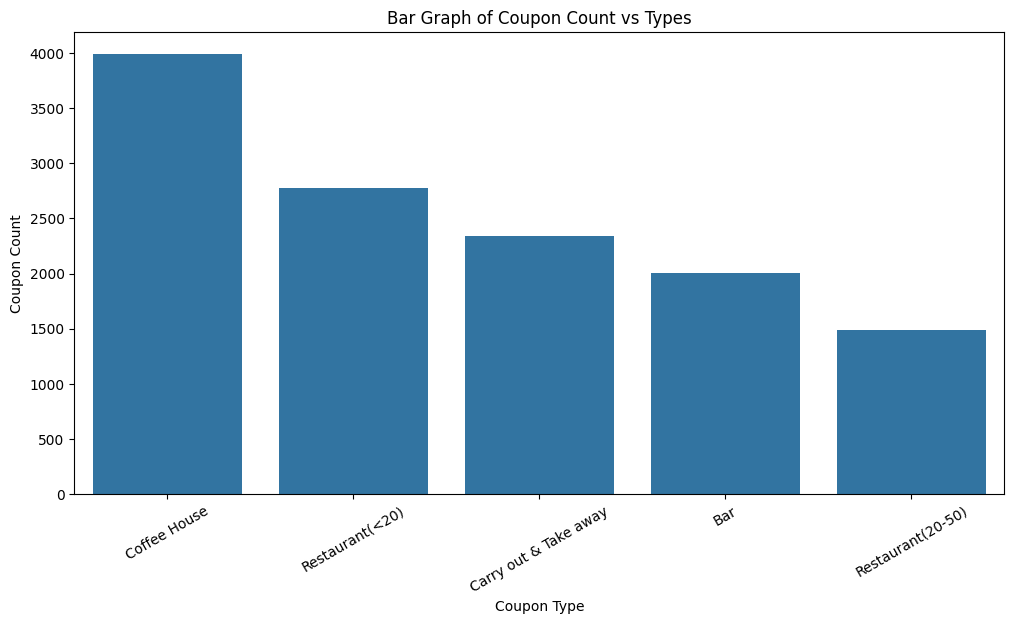

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for the coupon column
plt.figure(figsize=(12, 6))
sns.countplot(data=data_filled_noDupes, x='coupon', order=data_filled_noDupes['coupon'].value_counts().index)
plt.title('Bar Graph of Coupon Count vs Types')
plt.xlabel('Coupon Type')
plt.ylabel('Coupon Count')
plt.xticks(rotation=30)
plt.show()

6. Use a histogram to visualize the temperature column.

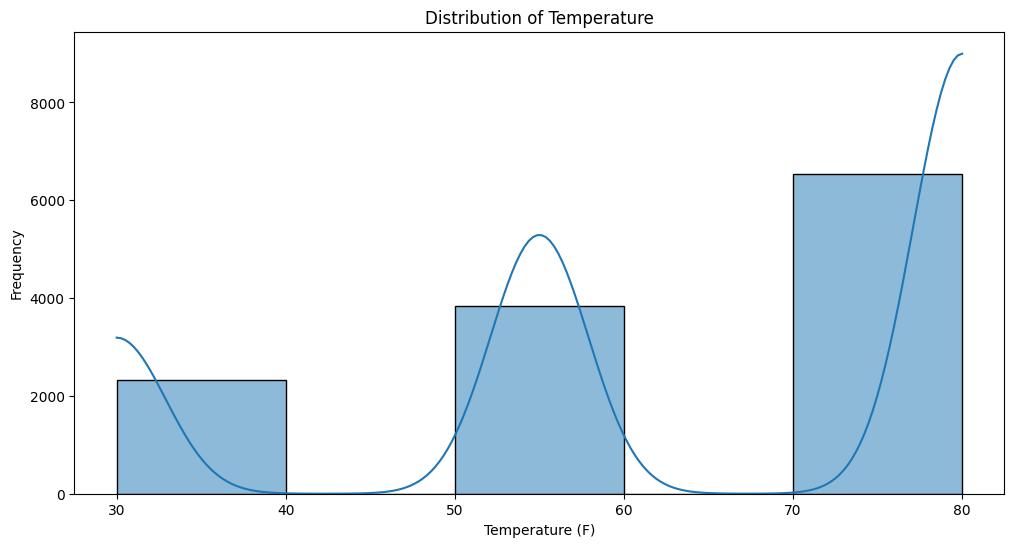

In [69]:
plt.figure(figsize=(12, 6))
sns.histplot(data['temperature'], kde=True, bins=5)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [70]:
# prompt: Create a new DataFrame that contains just the bar coupons.

data_filled_noDupes_BarCoupons = data_filled_noDupes[data_filled_noDupes['coupon'] == 'Bar']
data_filled_noDupes_BarCoupons.describe()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,2010.000000,2010.000000,2010.0,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,57.599502,0.433333,1.0,0.663184,0.253731,0.208955,0.791045,0.409950
std,17.946364,0.495659,0.0,0.472739,0.435254,0.406664,0.406664,0.491947
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. What proportion of bar coupons were accepted?


In [71]:
# prompt: What proportion of bar coupons were accepted?

bar_accepted = data_filled_noDupes_BarCoupons[data_filled_noDupes_BarCoupons['Y'] == 1].shape[0]
bar_total = data_filled_noDupes_BarCoupons.shape[0]
bar_acceptance_rate = bar_accepted / bar_total

print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2%}")

Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times



```
# This is formatted as code
```

1.   List item
2.   List item

a month to those who went more.


In [72]:
# prompt: 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

# Group data by bar visits and calculate acceptance rates
bar_visits_acceptance = data_filled_noDupes_BarCoupons.groupby('Bar').agg({'Y': 'mean'})

# Compare acceptance rates
less_than_4_acceptance = bar_visits_acceptance.loc[bar_visits_acceptance.index.isin(['never','less1','1~3'])]['Y'].mean()
more_than_4_acceptance = bar_visits_acceptance.loc[bar_visits_acceptance.index.isin(['4~8','gt8'])]['Y'].mean()

print(f"Acceptance rate for those who visited a bar 3 or fewer times a month: {less_than_4_acceptance:.2%}")
print(f"Acceptance rate for those who visited a bar more than 3 times a month: {more_than_4_acceptance:.2%}")

Acceptance rate for those who visited a bar 3 or fewer times a month: 42.59%
Acceptance rate for those who visited a bar more than 3 times a month: 75.55%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [73]:
# prompt: Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

# Filter for drivers who go to a bar more than once a month and are over 25
# print(data_filled_noDupes_BarCoupons.to_string())

bar_over_25 = data_filled_noDupes_BarCoupons[
    (data_filled_noDupes_BarCoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (data_filled_noDupes_BarCoupons['age'].isin(['26', '31', '36', '41', '46', '50plus']))
]

# Calculate the acceptance rate for this group
acceptance_bar_over_25 = bar_over_25['Y'].mean()

# Calculate the acceptance rate for all others
acceptance_all_others = data_filled_noDupes_BarCoupons[
    ~((data_filled_noDupes_BarCoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
      (data_filled_noDupes_BarCoupons['age'].isin(['26', '31', '36', '41', '46', '50plus'])))
]['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_bar_over_25:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_all_others:.2%}")

# Check for a significant difference (you might want to use a statistical test here)
print(f"Difference in acceptance rates: {acceptance_bar_over_25 - acceptance_all_others:.2%}")

Acceptance rate for drivers who go to a bar more than once a month and are over 25: 69.01%
Acceptance rate for all other drivers: 33.46%
Difference in acceptance rates: 35.55%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [74]:
# prompt: Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

# Filter for drivers who go to bars more than once a month, no kids, and occupations other than farming/fishing/forestry
filtered_data = data_filled_noDupes_BarCoupons[
    (data_filled_noDupes_BarCoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (data_filled_noDupes_BarCoupons['passanger'] != 'Kid(s)') &
    (~data_filled_noDupes_BarCoupons['occupation'].isin(['Farming Fishing & Forestry']))
]

# Calculate acceptance rate for the filtered group
acceptance_filtered = filtered_data['Y'].mean()

# Calculate acceptance rate for all other drivers (not meeting all criteria)
acceptance_others = data_filled_noDupes_BarCoupons[
    ~((data_filled_noDupes_BarCoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
      (data_filled_noDupes_BarCoupons['passanger'] != 'Kid(s)') &
      (~data_filled_noDupes_BarCoupons['occupation'].isin(['Farming Fishing & Forestry'])))
]['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month, no kids, and occupations other than farming/fishing/forestry: {acceptance_filtered:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_others:.2%}")

# Check for a significant difference
print(f"Difference in acceptance rates: {acceptance_filtered - acceptance_others:.2%}")

Acceptance rate for drivers who go to bars more than once a month, no kids, and occupations other than farming/fishing/forestry: 70.74%
Acceptance rate for all other drivers: 29.59%
Difference in acceptance rates: 41.14%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [75]:
# prompt: Compare the acceptance rates between those drivers who:
# - go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# - go to bars more than once a month and are under the age of 30 OR
# - go to cheap restaurants more than 4 times a month and income is less than 50K.

# Group 1: Bars > 1/month, no kids, not widowed
group1 = data_filled_noDupes_BarCoupons[
    (data_filled_noDupes_BarCoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (data_filled_noDupes_BarCoupons['passanger'] != 'Kid(s)') &
    (data_filled_noDupes_BarCoupons['maritalStatus'] != 'Widowed')
]
acceptance_rate_group1 = group1['Y'].mean()

# Group 2: Bars > 1/month, under 30
group2 = data_filled_noDupes_BarCoupons[
    (data_filled_noDupes_BarCoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (data_filled_noDupes_BarCoupons['age'] != '50plus') &
    (data_filled_noDupes_BarCoupons['age'] != '46') &
    (data_filled_noDupes_BarCoupons['age'] != '41') &
    (data_filled_noDupes_BarCoupons['age'] != '36') &
    (data_filled_noDupes_BarCoupons['age'] != '31') &
    (data_filled_noDupes_BarCoupons['age'] != '26')
]
acceptance_rate_group2 = group2['Y'].mean()

# Group 3: Cheap restaurants > 4/month, income < 50K
group3 = data_filled_noDupes[
    (data_filled_noDupes['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (data_filled_noDupes['income'] == 'Less than $12500')|
    (data_filled_noDupes['income'] == '$12500 - $24999')|
    (data_filled_noDupes['income'] == '$25000 - $37499')|
    (data_filled_noDupes['income'] == '$37500 - $49999')
]
acceptance_rate_group3 = group3['Y'].mean()

print(f"Acceptance Rate for Group 1: {acceptance_rate_group1:.2%}")
print(f"Acceptance Rate for Group 2: {acceptance_rate_group2:.2%}")
print(f"Acceptance Rate for Group 3: {acceptance_rate_group3:.2%}")

Acceptance Rate for Group 1: 70.74%
Acceptance Rate for Group 2: 66.67%
Acceptance Rate for Group 3: 58.09%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

OBSERVATIONS
Assuming anything over 60% is heavy usage (or considered success in terms of coupon acceptance).

1.   Folks with no kids accept bar coupons heavily (# Group 1: Bars > 1/month, **no kids**, not widowed: ACCEPTANCE: 70.74%).. Further Acceptance rate for drivers who go to bars more than once a month, **no kids**, and occupations other than farming/fishing/forestry: 70.74%

2.  Younger people Accept Bar Coupons more often (# Group 2: Bars > 1/month, under 30: ACCEPTANCE: 66.67%)

3. Seems like people who like to drink like to drink and hence accept bar coupons more readily (Acceptance rate for those who visited a bar more than 3 times a month: 75.55%)

*** END OF BAR COUPON SECTION ***

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [76]:
data_filled_noDupes_ExpensiveRestaurantCoupons = data_filled_noDupes[data_filled_noDupes['coupon'] == 'Restaurant(20-50)']
data_filled_noDupes_ExpensiveRestaurantCoupons.describe()
expRest_accepted = data_filled_noDupes_ExpensiveRestaurantCoupons[data_filled_noDupes_ExpensiveRestaurantCoupons['Y'] == 1].shape[0]
expRest_total = data_filled_noDupes_ExpensiveRestaurantCoupons.shape[0]
expRest_acceptance_rate = expRest_accepted / expRest_total

print(f"Proportion of Expensive Restaurant coupons accepted: {expRest_acceptance_rate:.2%}")

Proportion of Expensive Restaurant coupons accepted: 44.15%


In [90]:
#print(data_filled_noDupes_ExpensiveRestaurantCoupons.to_string())
# People who accept ExpensiveRestaurantCoupons and earn more than 100K
groupExp1 = data_filled_noDupes_ExpensiveRestaurantCoupons[
    ~(data_filled_noDupes_ExpensiveRestaurantCoupons['Restaurant20To50'].isin(['never', 'less1'])) &
     (data_filled_noDupes_ExpensiveRestaurantCoupons['income'].isin(['$100000 or More']))
]
acceptance_rate_groupExp1 = groupExp1['Y'].mean()
#print(groupExp1.to_string())

# People who accept ExpensiveRestaurantCoupons and unattached
groupExp2 = data_filled_noDupes_ExpensiveRestaurantCoupons[
    (data_filled_noDupes_ExpensiveRestaurantCoupons['Restaurant20To50'].isin(['1~3', '4~8', 'gt8'])) &
    (data_filled_noDupes_ExpensiveRestaurantCoupons['maritalStatus'].isin(['Single', 'Divorced', 'Widowed']))
]
acceptance_rate_groupExp2 = groupExp2['Y'].mean()

groupExp3 = data_filled_noDupes_ExpensiveRestaurantCoupons[
    (data_filled_noDupes_ExpensiveRestaurantCoupons['Restaurant20To50'].isin(['1~3', '4~8', 'gt8'])) &
    ~(data_filled_noDupes_ExpensiveRestaurantCoupons['maritalStatus'].isin(['Single', 'Divorced', 'Widowed']))
]
acceptance_rate_groupExp3 = groupExp3['Y'].mean()

print(f"High Income Acceptance Rate: {acceptance_rate_groupExp1:.2%}")
print(f"Unattached Status Acceptance Rate: {acceptance_rate_groupExp2:.2%}")
print(f"Attached Status Acceptance Rate: {acceptance_rate_groupExp3:.2%}")


High Income Acceptance Rate: 61.29%
Unattached Status Acceptance Rate: 56.76%
Attached Status Acceptance Rate: 52.67%


Surprisingly - high income earners (> 100K) would be thought of as inelastic to price but given a 61.29% acceptance rate (for high end restaruants), it appears that they do care about price and accept coupons to high end restaurants. It seems marital status does not matter with almost an even split in terms of high-end restaurant coupon acceptance.